In [1]:
import datetime
import numpy

from scipy.optimize import minimize

from ion_populations import single_ion_population_mass
from coordinates_system_transformation import spherical_to_cartesian, cartesian_to_spherical
from magnetic_field_functions import read_b_model
from longitude_functions import objective_function_rho_0_from_delta_longitude, objective_function_zlimN_from_longitude, delta_longitude_calculation, longitude_MAW_TEB_calculation
from density import rho_z
from alfven_velocity import v_alfven_calculation
from Current_Sheet_values_functions import density_and_scale_height_of_CS_calculation




# First method:
1° Reading of $x_i$, $y_i$, $z_i$, $|B_i|$ values along the magnetic field line instantaneously connected to the moon (based on JRM33+KK2005). With i the index of each point along this field line. Transformed the coordinate in the proper referentiel, so that the CS is properly aligned with z = 0. It can be choosen if the current layer is aligned with the centrifugal, jovicentric or magnetic equator.

2° Determining of $ρ_i$ along the field line, using the equation $ρ_i =ρ_0 * exp^{ - \sqrt{\frac{(r_i - r_0)^2 + z_i^2}{H} }}$ for a given $H$ and $ρ_0$. 

3° Determining of $v_{i}^{Alfvén}$ from these values of $ρ_i$ and $B_i$

4° Determining of travel time $t_{TEB}$ and $t_{MAW}$ --> determination of $\lambda_{TEB}$ and $\lambda_{MAW}$ --> determination of $\Delta \lambda$

5° Repeating steps 2° to 4° with different values of $\rho_0$ to minimise $|\Delta \lambda - \Delta \lambda_{observed}|$.

6° Repeating Step 5° for different values of $H$ to minimise $|\lambda_{TEB} - \lambda_\mathrm{TEB observed}|$ and $|\lambda_{MAW} - \lambda_\mathrm{MAW observed}|$.


In [6]:
R_J = 71492e3 # m

file_mag_model_north = "/Users/clouis/Documents/Etudes/Juno_moon_emissions/Callisto/PJ22_2019_09_12/Bmodel/Callisto_B_line_N_v2.txt"
file_mag_model_south = "/Users/clouis/Documents/Etudes/Juno_moon_emissions/Callisto/PJ22_2019_09_12/Bmodel/Callisto_B_line_S_v2.txt"

(r_N, theta_N, phi_N, B_total_N) = read_b_model(file_mag_model_north)
(r_S, theta_S, phi_S, B_total_S) = read_b_model(file_mag_model_south)

r_N = r_N*R_J
r_S = r_S*R_J

#B is in nT --> T
B_total_N = B_total_N*1e-9 # T: kg/(A.s^2)
B_total_S = B_total_S*1e-9 # T: kg/(A.s^2)


rotation_rate_callisto =  0.0098 # °/s

lambda_observed_MAW = 297.7
lambda_observed_TEB = 303.05


m_e = 9.109e-31 # kg
keV = 1.602e-16 # J == kg.m^2/s^2

rho_0_volumetric_first_guess = 4000/1e-6*m_e #kg/m^3
r_0 = 26.33*R_J

no_CS_calculation = False

E_array = numpy.array([10])*keV
z_lim_N_array = numpy.array([0.74, 0.96, 1.03, 1.63, 2.22, 2.8, 3.36])*R_J # correspond to specific H values [0.75, 0.94, 1, 1.5, 2., 2.5, 3.0] for CS aligned with centrifugal equator
#z_lim_N_array = numpy.array(z_lim_N in [0.15,0.46, 0.74, 1.115, 1.77, 2.4, 3.01]) # correspond to specific H values [0.75, 1, 1.21, 1.5, 2., 2.5, 3.0] for CS aligned with Mag equator

density_and_scale_height_of_CS_calculation(r_N, theta_N, phi_N, B_total_N,
                                   r_S, theta_S, phi_S, B_total_S,
                                   E_array,
                                   z_lim_N_array, r_0,
                                   lambda_observed_MAW,
                                   lambda_observed_TEB,
                                   rho_0_volumetric_first_guess = rho_0_volumetric_first_guess,
                                   rotation_rate =  0.0098,
                                   jovicentric_equator = False,
                                   centrifugal_equator = True,
                                   magnetic_equator = False,
                                   verbose = True,
                                   disk = False,
                                   torus = True)
    


(5.93E+07 m/s (E = 10.00 keV)
H: 0.75
ρ_0_optimized: 4.37E-27 kg/cm^3
ρ0: 4.37E-27 kg.cm^-3
n_0_ions: 1.13E-01 cm^-3
n_0_electrons: 1.80E-01 cm^-3
λ (TEB) from UV measurement: 303.05
λ (MAW) from UV measurement: 297.70
Δλ observed: 5.35°
λ TEB: 303.97°, 
λ MAW: 298.62°
Δλ: 5.35°
n_ions @ Callisto: 6.41E-02 cm^-3
n_electrons @ Callisto: 1.02E-01 cm^-3

 
 

(5.93E+07 m/s (E = 10.00 keV)
H: 0.94
ρ_0_optimized: 4.10E-27 kg/cm^3
ρ0: 4.10E-27 kg.cm^-3
n_0_ions: 1.06E-01 cm^-3
n_0_electrons: 1.69E-01 cm^-3
λ (TEB) from UV measurement: 303.05
λ (MAW) from UV measurement: 297.70
Δλ observed: 5.35°
λ TEB: 303.05°, 
λ MAW: 297.70°
Δλ: 5.35°
n_ions @ Callisto: 6.74E-02 cm^-3
n_electrons @ Callisto: 1.08E-01 cm^-3

 
 

(5.93E+07 m/s (E = 10.00 keV)
H: 1.00
ρ_0_optimized: 4.04E-27 kg/cm^3
ρ0: 4.04E-27 kg.cm^-3
n_0_ions: 1.04E-01 cm^-3
n_0_electrons: 1.66E-01 cm^-3
λ (TEB) from UV measurement: 303.05
λ (MAW) from UV measurement: 297.70
Δλ observed: 5.35°
λ TEB: 302.79°, 
λ MAW: 297.44°
Δλ: 5.35°
n_

## Plot with the best fit parameters

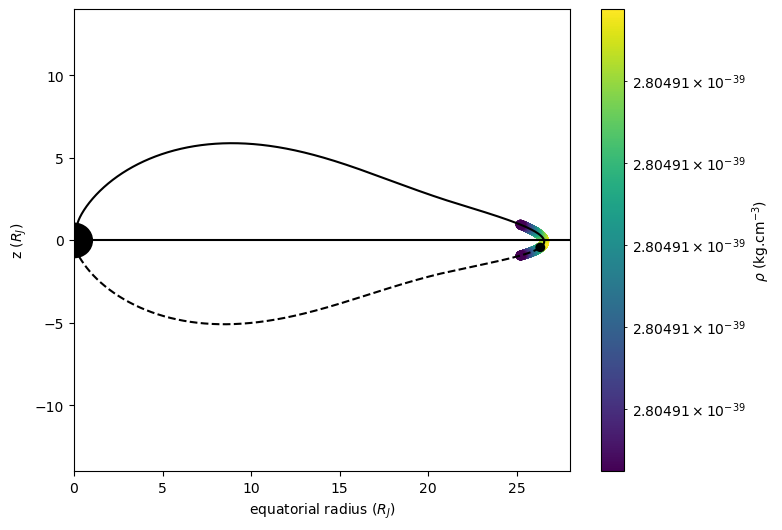

In [4]:
from plotting_functions import plot_MFL_and_rho_CS

# Centrifugal equator :
# Magnetic equator :
#H = 1.21*R_J
#rho_0_optimized = 3.12E-21 # km/m^3



z_lim_N = 0.96
H = 0.94*R_J
rho_0_optimized = 4.10E-21 # kg/m^3

equatorial_radius_N = numpy.sqrt(x_N**2 + y_N**2)
equatorial_radius_S = numpy.sqrt(x_S**2 + y_S**2)
mask_CS_N = (z_N <= z_lim_N*R_J) & (equatorial_radius_N > 10*R_J) # Second condition is to be sure no points close to the planet are taken
mask_CS_S = equatorial_radius_S >= equatorial_radius_N[mask_CS_N].min()

x_vals_CS = numpy.concatenate((x_N[mask_CS_N], x_S[mask_CS_S]))
y_vals_CS = numpy.concatenate((y_N[mask_CS_N], y_S[mask_CS_S]))
z_vals_CS = numpy.concatenate((z_N[mask_CS_N], z_S[mask_CS_S]))
equatorial_vals = numpy.concatenate((equatorial_radius_N[mask_CS_N], equatorial_radius_S[mask_CS_S]))

plot_MFL_and_rho_CS(x_N/R_J, y_N/R_J, z_N/R_J,
                        x_S/R_J, y_S/R_J, z_S/R_J,
                        mask_CS_N, mask_CS_S,
                        r_0, H, rho_0_optimized, disk = False,
                        )


## Summary of the results

$\lambda_\mathrm{MAW~observed~in~UV}$: 297.70°

$\lambda_\mathrm{TEB~observed~in~UV}$: 303.05°

**CS aligned with magnetic equator**
| $\rho_0 (\mathrm{kg}/\mathrm{cm}^{3}$)| H = 0.75 | H=1.0      | H = 1.21  | H = 1.5   | H = 2.0   | H = 2.5   | H = 3.0   |
| ---                                   | ---      | ---        | ---       | ---       | ---       | ---       | ---       |
| E = 10 keV                            | 4.73E-21 | 3.70E-21   | 3.12E-21  | 3.34E-21  | 2.98E-21  | 2.92E-21  | 2.90E-21  |
| $\lambda_\mathrm{MAW}$ (°)            | 299.33   | 298.43     | 296.83    | 297.70    | 295.57    | 294.60    | 293.77    |
| $\lambda_\mathrm{TEB}$ (°)            | 304.68   | 303.78     | 302.18    | 303.05    | 300.92    | 299.95    | 299.12    |



**CS aligned with centrifugal equator**
| $\rho_0 (\mathrm{kg}/\mathrm{cm}^{3}$)| H = 0.75 | H=0.94      | H=1.0      | H = 1.5   | H = 2.0   | H = 3.0   |
| ---                                   | ---      | ---        | ---        | ---       | ---       | ---       |
| E = 10 keV                            | 4.37E-21 | 4.10E-21   | 4.04E-21   | 3.79E-21  | 3.69E-21  | 3.57E-21  |
| $\lambda_\mathrm{MAW}$ (°)            | 298.62   | 297.70     | 297.44     | 295.56    | 294.21    | 292.39    |
| $\lambda_\mathrm{TEB}$ (°)            | 303.97   | 303.05     | 302.79     | 300.91    | 299.56    | 297.73    |

 
